In [14]:
import os
import numpy as np
import pandas as pd
from pathlib import Path
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from newsapi import NewsApiClient
from datetime import datetime, timedelta
import numpy as np
import requests
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from nltk.corpus import stopwords, reuters
import hvplot.pandas
%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/samuelarciniega/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [15]:
load_dotenv()

True

In [16]:
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")
#print(alpaca_api_key)

In [17]:
api_key = os.getenv("news_api")
#print(api_key)

In [18]:
newsapi = NewsApiClient(api_key=api_key)

In [33]:
#15Min interval
timeframe = "1D"
start_date = pd.Timestamp("2021-06-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-06-30", tz="America/New_York").isoformat()
#today = pd.Timestamp("2021-01-02", tz="America/New_York").isoformat()
ticker = ["AAPL"]
apple_ticker = alpaca.get_barset(
    ticker,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df
apple_ticker.dropna(inplace=True)
apple_ticker.head(50)
apple_ticker.dropna(inplace=True)

In [31]:
apple_df = pd.DataFrame()
apple_df["Apple"] = apple_ticker["AAPL"]["close"]
#apple_df = apple_df.pct_change().dropna()
apple_df.index = apple_df.index.date 
apple_df.tail()

,Apple
2021-06-24,133.40
2021-06-25,133.11
2021-06-28,134.75
2021-06-29,136.33
2021-06-30,136.94


In [32]:
apple_returns = apple_df.pct_change().dropna()
apple_returns.head(50)

,Apple
2021-06-02,0.006356
2021-06-03,-0.012271
2021-06-04,0.018818
2021-06-07,0.000238
2021-06-08,0.006592
2021-06-09,0.003314
2021-06-10,-0.008257
2021-06-11,0.009849
2021-06-14,0.024640
2021-06-15,-0.005748


In [39]:
df = pd.DataFrame(apple_ticker["AAPL"])
df["Returns"] = df["close"].pct_change()*100
df["Lagged"] = df["Returns"].shift()
df = df.dropna()
df.head()

,open,high,low,close,volume,Returns,Lagged
time,,,,,,,
2021-06-03 00:00:00-04:00,124.66,124.85,123.1300,123.555,68331470,-1.227116,0.635559
2021-06-04 00:00:00-04:00,124.07,126.16,123.8500,125.880,63613126,1.881753,-1.227116
2021-06-07 00:00:00-04:00,126.18,126.32,124.8321,125.910,62351961,0.023832,1.881753
2021-06-08 00:00:00-04:00,126.62,128.46,126.2101,126.740,67231488,0.659201,0.023832
2021-06-09 00:00:00-04:00,127.21,127.75,126.5200,127.160,46854275,0.331387,0.659201


In [43]:
train = df[:'2021-06-07']
test = df['2021-06-11':]
train.head()

,open,high,low,close,volume,Returns,Lagged
time,,,,,,,
2021-06-03 00:00:00-04:00,124.66,124.85,123.1300,123.555,68331470,-1.227116,0.635559
2021-06-04 00:00:00-04:00,124.07,126.16,123.8500,125.880,63613126,1.881753,-1.227116
2021-06-07 00:00:00-04:00,126.18,126.32,124.8321,125.910,62351961,0.023832,1.881753


In [44]:
X_train = train["Lagged"].to_frame()
X_test = test["Lagged"].to_frame()
y_train = train["Returns"]
y_test = test["Returns"]

In [45]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [46]:
predicted_y_values = model.predict(X_test)

In [47]:
Results = y_test.to_frame()
Results["Predicted Return"] = predicted_y_values

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fdd486134f0>,
      dtype=object)

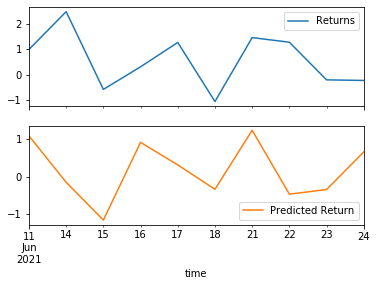

In [48]:
Results[:10].plot(subplots=True)